# FACE RECOGNITION
Realized by : Taktak Ranim & Haj Taher Chaima

**Human face recognition is a challenging task because of the variability of facial expressions, personal appearances, variant poses, and illumination.**

**Reducing the image dimension is necessary to improve the classification processing time since the object recognition system requires an enormous volume for the computing process. LBPH "Local binary patterns histogram" is one of the most popular conventional methods; it is used for robust data representation, as well as histograms, for features reduction.**

**And using SVM algorithm for image classification**
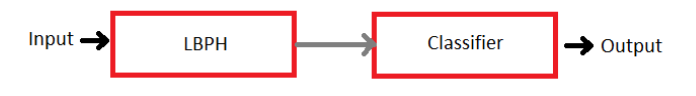


# Ignore the warnings


In [1]:
import warnings
warnings.filterwarnings('ignore')


# Import relevant libraries


In [2]:
import os
import cv2 #computer vision library
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

# Set up the current working directory


In [3]:
os.chdir(r'C:\Users\MSI I5\Documents\3ATEL1\image mining\Mini_P') 
os.getcwd()

'C:\\Users\\MSI I5\\Documents\\3ATEL1\\image mining\\Mini_P'

# Load Dataset
dataset used:
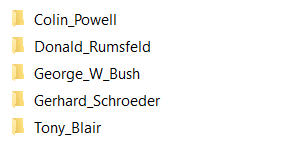

In [4]:
#define a functio which allows to show the data
def show_dataset(images_class, label):
    # show data for 1 class
    plt.figure(figsize=(15,5))
    #initialization
    k = 0
    #display only 5 images per class 
    for i in range(1,6):
        plt.subplot(1,5,i)
        try :
            plt.imshow(images_class[k][:,:,::-1])
        except :
            plt.imshow(images_class[k], cmap='gray')
        plt.title(label) 
        plt.axis('off')
        plt.tight_layout()
        k += 1
    plt.show()

In [5]:
#dataset folder
dataset_folder = "C:/Users/MSI I5/Documents/3ATEL1/image mining/Mini_P/data/"

names = []
images = []

for folder in os.listdir(dataset_folder):
    for name in os.listdir(os.path.join(dataset_folder, folder))[:70]: # limit only 70 face per class
        if name.find(".jpg") > -1 :
            img = cv2.imread(os.path.join(dataset_folder + folder, name))
            images.append(img)
            names.append(folder)

In [6]:
labels = np.unique(names)
#check labels name
labels

array(['Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush',
       'Gerhard_Schroeder', 'Tony_Blair'], dtype='<U17')

In [7]:
labels.shape

(5,)

**We have 5 labels which are 'Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush','Gerhard_Schroeder', and 'Tony_Blair' : our dataset is composed of 5 categories.** 

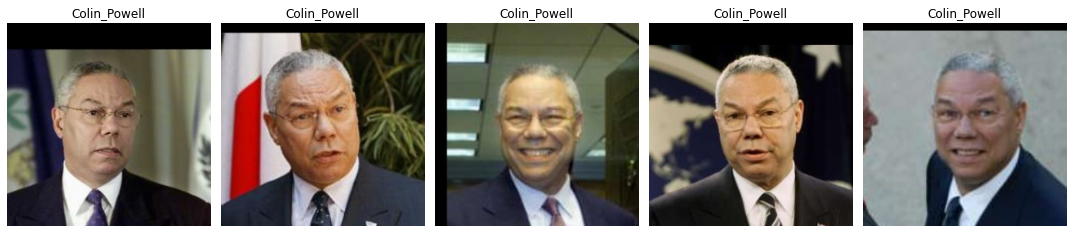

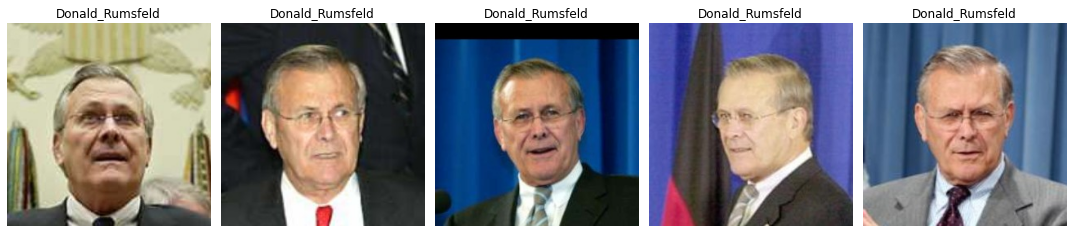

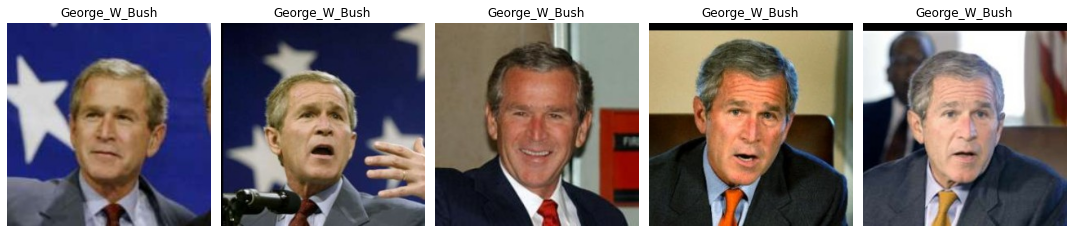

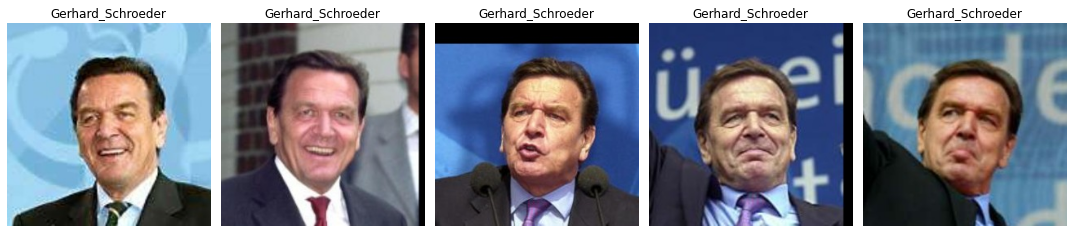

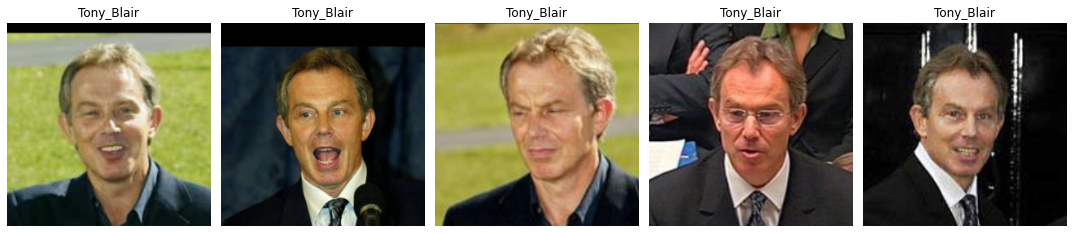

In [8]:
#show 5 images per class using show_dataset function developed in the previous section
for label in labels:
    
    ids = np.where(label== np.array(names))[0]
    images_class = images[ids[0] : ids[-1] + 1]
    show_dataset(images_class, label)

# the use of cascade classifier
**the use of haarcascade frontface from the OpenCV library, which provides the Haar-Cascade method which is a one method
of Viola and Jones allow the face detection.**

In [9]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [10]:
#create a function allows the face detection
def detect_face(img, idx):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grayscale
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    try :
        x, y, w, h = faces[0]

        img = img[y:y+h, x:x+w] 
        img = cv2.resize(img, (100, 100)) #resize the images 100*100
    except :
        print("Face not found in image index", i)
        img = None
    return img

In [11]:
#define cropped images
croped_images = []
for i, img in enumerate(images) :
    img = detect_face(img, i)
    if img is not None :
        croped_images.append(img)
    else :
        del names[i]

Face not found in image index 45
Face not found in image index 60
Face not found in image index 103
Face not found in image index 115
Face not found in image index 147
Face not found in image index 167
Face not found in image index 171
Face not found in image index 172
Face not found in image index 248
Face not found in image index 267


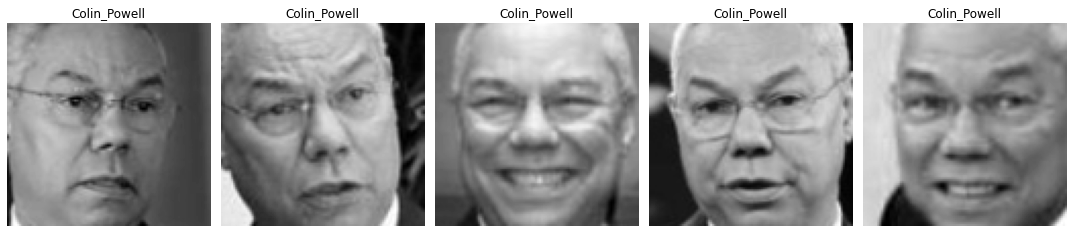

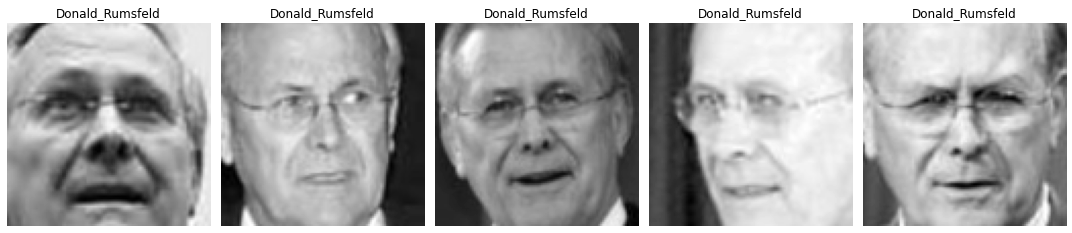

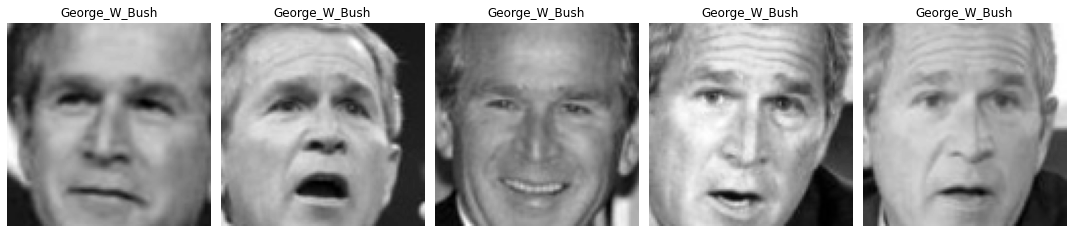

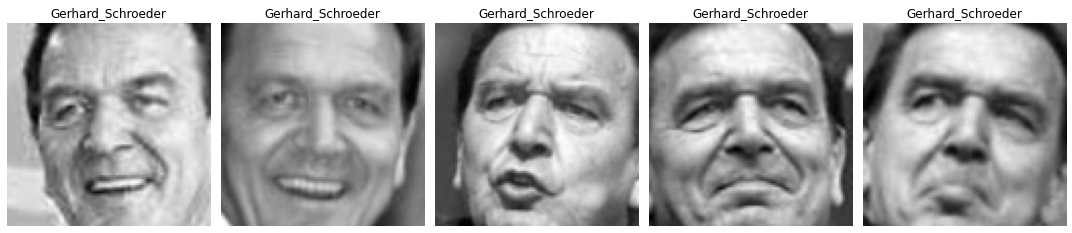

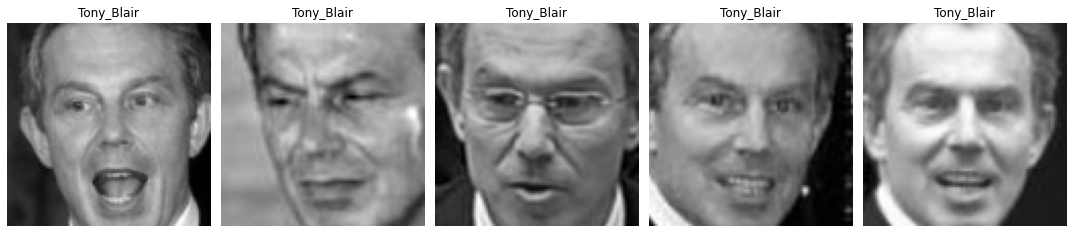

In [12]:
for label in labels:
    
    ids = np.where(label== np.array(names))[0]
    images_class = croped_images[ids[0] : ids[-1] + 1] # select croped images for each class
    show_dataset(images_class, label)

# Label Encoding 
**Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.**

In [13]:
#import label encoder
from sklearn.preprocessing import LabelEncoder

In [14]:
#print(names)

In [15]:
LE = LabelEncoder()

LE.fit(names)

print(LE.classes_)

['Colin_Powell' 'Donald_Rumsfeld' 'George_W_Bush' 'Gerhard_Schroeder'
 'Tony_Blair']


In [16]:
name_vec = LE.transform(names)

In [17]:
print(name_vec)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4]


**As we can see we have transformed:**

    Colin_Powell => 0
    
    Donald_Rumsfeld => 1
    
    George_W_Bush => 2
    
    Gerhard_Schroeder => 3
    
    Tony_Blair => 4

# Spliting the dataset (70% train, 30% test)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(np.array(croped_images, dtype=np.float32),np.array(name_vec),test_size=0.3,random_state=42)

In [20]:
print("the shape of x_train is :",x_train.shape)
print("the shape of y_train is :",y_train.shape)
print("the shape of x_test is :",x_test.shape)
print("the shape of y_test is :",y_test.shape)

the shape of x_train is : (208, 100, 100)
the shape of y_train is : (208,)
the shape of x_test is : (90, 100, 100)
the shape of y_test is : (90,)


**Local Binary Pattern (LBP) is a simple yet very efficient texture operator which labels the pixels of an image by thresholding the neighborhood of each pixel and considers the result as a binary number.**
# Extracting LBP Histograms
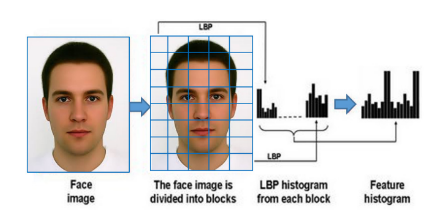

In [21]:
from skimage.feature import local_binary_pattern

In [22]:
P = 8
R = 1
img = x_train[0]
lbp_img = local_binary_pattern(img, P=P, R=R, method="default")

the use of the function: **local_binary_pattern(img, P, R)**

parameters :

**P : Neighbors: the number of sample points to build the circular local binary pattern. Keep in mind: the more sample points you include, the higher the computational cost. It is usually set to 8. (number of sample point).**

**R : Radius: the radius is used to build the circular local binary pattern and represents the radius around the central pixel. It is usually set to 1.**
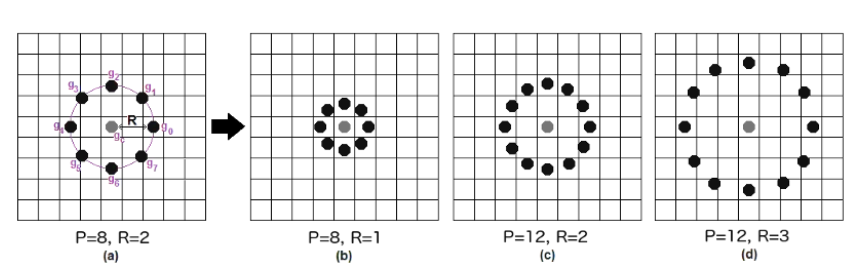


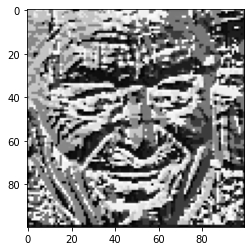

In [23]:
plt.imshow(lbp_img, cmap="gray")


In [24]:
H = np.histogram(lbp_img.ravel(),bins=2**P,range=(0, 2**P),density=True)[0] 

**create a histogram of the lbp image which defines the characteristics of the image original image**

In [43]:
print(H)

[0.02 0.01 0.   0.01 0.01 0.   0.01 0.03 0.   0.   0.   0.   0.   0.
 0.01 0.03 0.01 0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.
 0.03 0.   0.04 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.
 0.02 0.   0.   0.   0.05 0.   0.01 0.01 0.01 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.03 0.   0.   0.   0.   0.   0.   0.   0.06 0.   0.   0.   0.03 0.
 0.01 0.01 0.   0.01 0.   0.02 0.   0.   0.   0.07 0.   0.   0.   0.
 0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.01 0.02 0.   0.04
 0.   0.   0.   0.04 0.   0.   0

<function matplotlib.pyplot.show(close=None, block=None)>

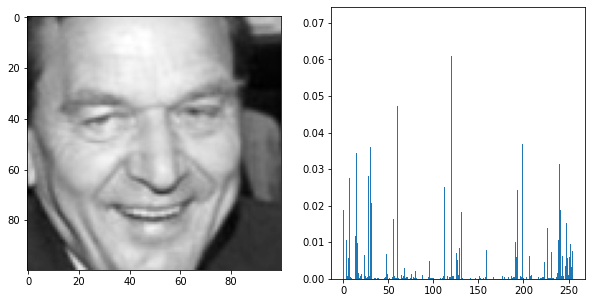

In [41]:
#plot the image and its histogram
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
axis = np.arange(len(H))
plt.bar(axis, H)

plt.show

# LBPH & SVM for face recognition
There are different types of face recognition algorithms, for example:

Eigenfaces (1991)

Local Binary Patterns Histograms (LBPH) (1996)

Fisherfaces (1997)

Scale Invariant Feature Transform (SIFT) (1999)

Speed Up Robust Features (SURF) (2006)

Each method has a different approach to extract the image information and perform the matching with the input image.

Today we gonna use  one of the oldest and more popular face recognition algorithms: **Local Binary Patterns Histograms (LBPH).**

In [27]:
from sklearn.neighbors import DistanceMetric
from sklearn.svm import SVC

**Feature : LBP**

**Classifier : SVM**

**Metric : Chi 2**

**Support Vector Machines**

Are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.
Support Vector Machines is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples.

In [28]:
class LBPH_SVM():
    #class for LBPH  + SVM 
    #svm parameters
    def __init__(self, C=10, Gamma=0.01):
        self.svm = SVC(kernel='precomputed', C=C, gamma=Gamma)
        #chi-square (χ2) statistic is a measure of the difference between the observed and expected frequencies of the
        #outcomes of a set of events or variables.
        self.chi2 = DistanceMetric.get_metric('pyfunc', func=self.chi2_distance)
        self.face_histograms = []
        self.hist_mat = []
        
    def chi2_distance(self, hist1, hist2, gamma=0.5): 
        chi = - gamma * np.sum(((hist1 - hist2) ** 2) / (hist1 + hist2 + 1e-7)) #chi 2 function
        return chi

    def find_lbp_histogram(self, image, P=8, R=1, eps=1e-7, n_window=(8,8)):
        E = []
        h, w = image.shape
        h_sz = int(np.floor(h/n_window[0]))
        w_sz = int(np.floor(w/n_window[1]))
        lbp_img = local_binary_pattern(image, P=P, R=R, method="default")
        for (x, y, C) in self.sliding_window(lbp_img, stride=(h_sz, w_sz), window=(h_sz, w_sz)):
            if C.shape[0] != h_sz or C.shape[1] != w_sz:
                continue
            H = np.histogram(C,bins=2**P, range=(0, 2**P),density=True)[0] 
            
            H = H.astype("float")
            H /= (H.sum() + eps)
            E.extend(H)
        return E
    
    def sliding_window(self, image, stride, window):
        for y in range(0, image.shape[0], stride[0]):
            for x in range(0, image.shape[1], stride[1]):
                yield (x, y, image[y:y + window[1], x:x + window[0]])
                   
    def train(self, x, y): #training
        self.face_histograms = [self.find_lbp_histogram(img) for img in x]
        self.hist_mat = np.array(self.face_histograms, dtype=np.float32)
        K = self.chi2.pairwise(self.hist_mat,self.hist_mat)
        self.svm.fit(K, y)
    
    def predict(self, x): #prediction
        hists = [self.find_lbp_histogram(img) for img in x]
        hist_mat = np.array(hists, dtype=np.float32)
        K = self.chi2.pairwise(hist_mat, self.hist_mat)
        idx = self.svm.predict(K)

        return idx, None

In [29]:
lbph_svm_model = LBPH_SVM()

In [30]:
#train the model by the train function
lbph_svm_model.train(x_train, y_train)


In [31]:
#prediction using predict function
y_predict = lbph_svm_model.predict(x_test)[0]

In [32]:
y_predict

array([2, 3, 4, 0, 1, 3, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 1,
       4, 0, 0, 2, 4, 1, 3, 4, 0, 4, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       3, 2, 3, 4, 2, 2, 2, 2, 1, 4, 4, 1, 3, 0, 3, 0, 0, 2, 2, 2, 0, 0,
       4, 0, 3, 4, 1, 2, 4, 2, 2, 3, 1, 0, 4, 4, 2, 0, 4, 1, 1, 1, 1, 0,
       0, 2])

# Confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [34]:
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 6))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

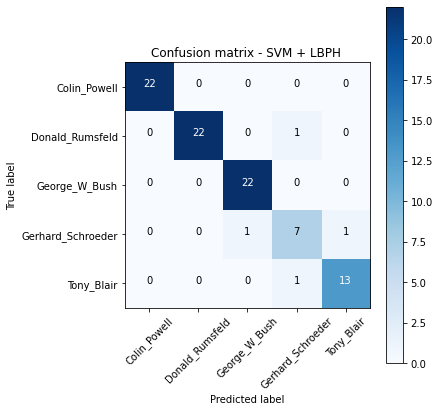

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels, normalize=False,title='Confusion matrix - SVM + LBPH ')

# Classification report

In [37]:
print("== Classification Report - SVM  + LBPH  ==\n")
print(classification_report(y_test, y_predict, target_names=labels))

== Classification Report - SVM  + LBPH  ==

                   precision    recall  f1-score   support

     Colin_Powell       1.00      1.00      1.00        22
  Donald_Rumsfeld       1.00      0.96      0.98        23
    George_W_Bush       0.96      1.00      0.98        22
Gerhard_Schroeder       0.78      0.78      0.78         9
       Tony_Blair       0.93      0.93      0.93        14

         accuracy                           0.96        90
        macro avg       0.93      0.93      0.93        90
     weighted avg       0.96      0.96      0.96        90

